# Melanoma Cancer Pytorch Lightning CNN

https://www.kaggle.com/code/stpeteishii/embryo-quality-pytorch-lightning-cnn

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.data import random_split, SubsetRandomSampler
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from pytorch_lightning import LightningModule
from pytorch_lightning import Trainer
import pytorch_lightning as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image

Este código é uma coleção de importações de bibliotecas e módulos do Python que provavelmente serão usados para um projeto de aprendizado de máquina, particularmente para um projeto de visão computacional ou deep learning:
* os: Fornece funções para interagir com o sistema operacional, como navegar por diretórios e trabalhar com arquivos.
* random: Fornece funções para gerar números aleatórios e manipular sequências aleatórias.
* numpy: Biblioteca fundamental para trabalhar com arrays multidimensionais e operações matemáticas.
* pandas: Biblioteca para análise e manipulação de dados, ideal para trabalhar com dataframes.
* tqdm: Biblioteca para adicionar barras de progresso a iterações longas, tornando o código mais amigável.
* PIL: (Pillow) Uma biblioteca para trabalhar com imagens em Python, permitindo que você carregue, manipule e salve imagens.
* Bibliotecas do PyTorch:
* torch: Biblioteca de deep learning do PyTorch, fornece a base para construir modelos e treinar redes neurais.
* torch.nn: Fornece módulos para construir redes neurais, como camadas (Conv2D, Linear, etc.), funções de ativação (ReLU, sigmoid, etc.), e outros componentes.
* torch.nn.functional: Fornece funções úteis para construir e treinar redes neurais, incluindo operações como convolução, pooling e ativação.
* torch.utils.data: Fornece ferramentas para lidar com dados de treinamento e teste, como DataLoader, Dataset, SubsetRandomSampler, etc.
* torchvision: Uma biblioteca que fornece datasets, transformações de imagem e modelos pré-treinados.
* datasets: Fornece acesso a datasets de imagem populares, como MNIST, CIFAR10, ImageNet, etc.
* transforms: Fornece uma coleção de transformações de imagem para pré-processamento de dados de imagem, como ToTensor, Resize, Normalize, etc.
* models: Fornece modelos pré-treinados que você pode utilizar ou ajustar para seus próprios problemas.
* torchvision.utils: Fornece funções para visualização de imagens, como make_grid.
* pytorch_lightning: Uma biblioteca que simplifica o treinamento de modelos de deep learning com o PyTorch, fornecendo recursos para gerenciamento de treinamento, checkpoints, otimização, etc.
* LightningModule: Uma classe base para construir modelos de deep learning com o PyTorch Lightning.
* Trainer: Classe para gerenciar o processo de treinamento.
Outras Bibliotecas:
* matplotlib.pyplot: Biblioteca para plotar gráficos e visualizações.
* sklearn.model_selection: Fornece ferramentas para divisão de dados em conjuntos de treinamento e teste, como train_test_split.
* sklearn.metrics: Fornece métricas para avaliar o desempenho de modelos de aprendizado de máquina, como classification_report.
Em resumo, este código está importando uma variedade de bibliotecas e módulos que serão usados para um projeto de aprendizado de máquina baseado em visão computacional e usando o PyTorch como framework de deep learning.

In [2]:
classes=[]
paths=[]
for dirname, _, filenames in os.walk('/kaggle/input/melanoma-cancer-dataset/train'):
    for filename in filenames:
        classes+=[dirname.split('/')[-1]]
        paths+=[(os.path.join(dirname, filename))]

Este código está criando duas listas: classes e paths. Ele itera através de todos os arquivos dentro do diretório /kaggle/input/melanoma-cancer-dataset/train para:
os.walk('/kaggle/input/melanoma-cancer-dataset/train'): Percorre o diretório /kaggle/input/melanoma-cancer-dataset/train e suas subpastas. os.walk retorna uma tupla (dirname, _, filenames):
* dirname: O caminho do diretório atual.
* _: Lista de subdiretórios (não usada aqui, por isso _).
* filenames: Lista de nomes de arquivos no diretório atual.
for filename in filenames: Para cada arquivo no diretório atual:
classes += [dirname.split('/')[-1]]:
* dirname.split('/'): Divide o caminho do diretório atual em partes, usando / como delimitador.
* [-1]: Seleciona a última parte do caminho, que corresponde ao nome da classe (o nome do subdiretório).
* classes += [ ... ]: Adiciona o nome da classe à lista classes.
paths += [os.path.join(dirname, filename)]:
* os.path.join(dirname, filename): Cria o caminho completo para o arquivo, combinando o diretório atual (dirname) e o nome do arquivo (filename).
* paths += [ ... ]: Adiciona o caminho completo do arquivo à lista paths.

In [3]:
class_names=['Benign','Malignant']
print(class_names)
normal_mapping=dict(zip(class_names,[0,1])) 
reverse_mapping=dict(zip([0,1],class_names))       
dir0='/kaggle/input/melanoma-cancer-dataset/train'

data=pd.DataFrame(columns=['path','class','label'])
data['path']=paths
data['class']=classes
data['label']=data['class'].map(normal_mapping)
print(len(data))

['Benign', 'Malignant']
11879


Este código está criando um dataframe Pandas (data) para organizar os dados de imagem, relacionando os caminhos das imagens com suas classes e labels numéricas. Vamos analisar cada passo:
class_names=['Benign','Malignant']:
Define uma lista com os nomes das classes para o problema de classificação, que são "Benign" e "Malignant".
print(class_names):
Imprime a lista class_names, mostrando os nomes das classes.
normal_mapping=dict(zip(class_names,[0,1])):
Cria um dicionário normal_mapping que mapeia os nomes das classes para números (0 e 1). Este dicionário será usado para converter as strings de classe para labels numéricas.
zip é usado para criar pares (chave, valor) a partir das duas listas: class_names e [0, 1].
reverse_mapping=dict(zip([0,1],class_names)):
Cria um dicionário reverse_mapping que mapeia os números (0 e 1) para os nomes das classes. Este dicionário é útil para converter as labels numéricas de volta para os nomes das classes.
dir0='/kaggle/input/melanoma-cancer-dataset/train':
Define o caminho do diretório raiz para os dados de treinamento.
data=pd.DataFrame(columns=['path','class','label']):
Cria um dataframe vazio chamado data com colunas "path", "class" e "label".
data['path']=paths:
Atribui a lista paths (que contém os caminhos das imagens) à coluna "path" do dataframe.
data['class']=classes:
Atribui a lista classes (que contém os nomes das classes) à coluna "class" do dataframe.
data['label']=data['class'].map(normal_mapping):
Usa o dicionário normal_mapping para converter os nomes das classes na coluna "class" em labels numéricas e atribui esses valores à coluna "label".
data['class'].map(normal_mapping) aplica o mapeamento do dicionário a cada valor na coluna "class", convertendo cada nome de classe para seu número correspondente.
print(len(data)):
Imprime o comprimento do dataframe, mostrando o número de imagens no dataset.
Em resumo, este código organiza os dados de imagem em um dataframe Pandas que inclui o caminho, a classe e a label numérica de cada imagem. Este dataframe pode ser usado para criar um dataset do PyTorch e treinar um modelo de aprendizado de máquina para classificar imagens de melanoma e nevus.

In [4]:
transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

1. transforms.Compose([ ... ]):
Esta função Compose cria uma sequência de transformações que serão aplicadas em ordem. Cada transformação é um objeto da biblioteca torchvision.transforms.
2. transforms.RandomRotation(10):
Aplica uma rotação aleatória às imagens, girando-as entre -10 e +10 graus. Isso ajuda a aumentar os dados, tornando o modelo mais robusto a rotações nas imagens.
3. transforms.RandomHorizontalFlip():
Inverte as imagens horizontalmente com uma probabilidade de 50%. Isso também é uma técnica de aumento de dados, ajudando o modelo a ser menos sensível a diferenças de orientação.
4. transforms.Resize(224):
Redimensiona as imagens, garantindo que o menor lado tenha 224 pixels. A imagem é redimensionada proporcionalmente.
5. transforms.CenterCrop(224):
Corta a imagem no centro, deixando um quadrado de 224x224 pixels. Essa etapa geralmente é necessária para garantir que todas as imagens tenham o mesmo tamanho antes de serem alimentadas no modelo.
6. transforms.ToTensor():
Converte a imagem em um tensor do PyTorch. O tensor é uma estrutura de dados eficiente para computação numérica.
7. transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
Normaliza os valores dos pixels do tensor, subtraindo a média e dividindo pelo desvio padrão. Isso é crucial para melhorar o desempenho do treinamento, pois os modelos de aprendizado de máquina geralmente se beneficiam de dados normalizados. Os valores fornecidos (médias e desvios padrão) são valores padrão para imagens do ImageNet, que podem ser usados ​​como um ponto de partida.
Em resumo, a sequência de transformações transform:
* Aumenta os dados por meio de rotação e espelhamento horizontal aleatórios.
* Reformata as imagens para um tamanho consistente (224x224 pixels).
* Converte a imagem em um tensor do PyTorch.
* Normaliza os valores dos pixels para melhorar o desempenho do treinamento.

In [5]:
def create_path_label_list(df):
    path_label_list = []
    for _, row in df.iterrows():
        path = row['path']
        label = row['label']
        path_label_list.append((path, label))
    return path_label_list

path_label = create_path_label_list(data)
path_label = random.sample(path_label,len(path_label))
print(len(path_label))
print(path_label[0:3])

11879
[('/kaggle/input/melanoma-cancer-dataset/train/Benign/803.jpg', 0), ('/kaggle/input/melanoma-cancer-dataset/train/Benign/2207.jpg', 0), ('/kaggle/input/melanoma-cancer-dataset/train/Malignant/3466.jpg', 1)]


* Extrai os caminhos das imagens e as labels numéricas de um dataframe.
* Cria uma lista de tuplas (path, label) que representam os dados de imagem.
* Embaralha aleatoriamente essa lista, garantindo que os dados sejam apresentados ao modelo em uma ordem aleatória durante o treinamento.

In [6]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, path_label, transform=None):
        self.path_label = path_label
        self.transform = transform

    def __len__(self):
        return len(self.path_label)

    def __getitem__(self, idx):
        path, label = self.path_label[idx]
        img = Image.open(path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        return img, label

CustomDataset:
* Fornece uma interface para carregar e transformar imagens e suas labels.
* É compatível com os DataLoaders do PyTorch.
* Permite que você especifique uma transformação de imagem opcional para ser aplicada durante o carregamento.

In [7]:
class ImageDataset(pl.LightningDataModule):
    def __init__(self, path_label, batch_size=32):
        super().__init__()
        self.path_label = path_label
        self.batch_size = batch_size
        self.transform = transforms.Compose([
            transforms.Resize(224),             # resize shortest side to 224 pixels
            transforms.CenterCrop(224),         # crop longest side to 224 pixels at center            
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

    def setup(self, stage=None):
        dataset = CustomDataset(self.path_label, self.transform)
        dataset_size = len(dataset)
        train_size = int(0.8 * dataset_size) 
        val_size = dataset_size - train_size
        print(train_size,val_size)

        self.train_dataset = torch.utils.data.Subset(dataset, range(train_size))
        self.val_dataset = torch.utils.data.Subset(dataset, range(train_size, dataset_size))

    def __len__(self):
        if self.train_dataset is not None:
            return len(self.train_dataset)
        elif self.val_dataset is not None:
            return len(self.val_dataset)
        else:
            return 0        

    def __getitem__(self, index):
        if self.train_dataset is not None:
            return self.train_dataset[index]
        elif self.test_dataset is not None:
            return self.test_dataset[index]
        else:
            raise IndexError("Index out of range. The dataset is empty.")

    def train_dataset(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataset(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size)


ImageDataset:
* Define um módulo de dados que estende pl.LightningDataModule para lidar com dados de imagem.
* Define transformações para pré-processar imagens.
* Divide o dataset em conjuntos de treinamento e validação.
* Cria DataLoaders para carregar os dados em batches durante o treinamento.

In [8]:
class DataModule(pl.LightningDataModule):
    
    def __init__(self, transform=transform, batch_size=16):
        super().__init__()
        self.root_dir = "/kaggle/input/melanoma-cancer-dataset/train"
        self.transform = transform
        self.batch_size = batch_size

    def setup(self, stage=None):
        data_set = datasets.ImageFolder(root=self.root_dir, transform=self.transform)
        
        n_data = len(dataset)
        n_train = int(0.8 * n_data)
        n_val = n_data - n_train
        train_dataset, val_dataset =  random_split(dataset, [n_train, n_val])

        self.train_dataset = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        self.val_dataset = DataLoader(val_dataset, batch_size=self.batch_size)
    
    def train_dataloader(self):
        return self.train_dataset

    def val_dataloader(self):
        return self.val_dataset
    
    def test_dataloader(self):
        return self.test_dataset

DataModule:
* Define um módulo de dados que estende pl.LightningDataModule para lidar com o dataset de melanoma e nevus.
* Carrega o dataset de imagem a partir do diretório self.root_dir.
* Divide o dataset em conjuntos de treinamento e validação.
* Aplica uma transformação de imagem aos dados.
* Cria DataLoaders para carregar os dados em batches durante o treinamento.

In [9]:
class ConvolutionalNetwork(LightningModule):
    
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.fc4 = nn.Linear(20, len(class_names))

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 54 * 54)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        X, y = train_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("train_loss", loss)
        self.log("train_acc", acc)
        return loss

    def validation_step(self, val_batch, batch_idx):
        X, y = val_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("val_loss", loss)
        self.log("val_acc", acc)

    def test_step(self, test_batch, batch_idx):
        X, y = test_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("test_loss", loss)
        self.log("test_acc", acc)

ConvolutionalNetwork(LightningModule):
* Define um modelo de CNN para classificação de imagens.
* Utiliza PyTorch Lightning para simplificar o treinamento e a avaliação.
* Implementa passos de treinamento, validação e teste para registrar a perda e a precisão.

In [10]:
dataset = ImageDataset(path_label)
dataset.setup() 
train_dataloader = dataset.train_dataloader
val_dataloader = dataset.val_dataloader
#test_dataloader = dataset.test_dataloader
datamodule = DataModule()
model = ConvolutionalNetwork()
trainer = pl.Trainer(max_epochs=20)
trainer.fit(model, datamodule)
val_loader = datamodule.val_dataloader()
trainer.test(dataloaders=val_loader)

9503 2376


Sanity Checking: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8537611961364746     │
│         test_loss         │    1.0320292711257935     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.0320292711257935, 'test_acc': 0.8537611961364746}]

Isso demonstra um processo completo de treinamento de um modelo de CNN usando o PyTorch Lightning. Ele inclui etapas de:
* Pré-processamento de dados
* Criação do modelo
* Treinamento
* Validação
Teste (opcional)

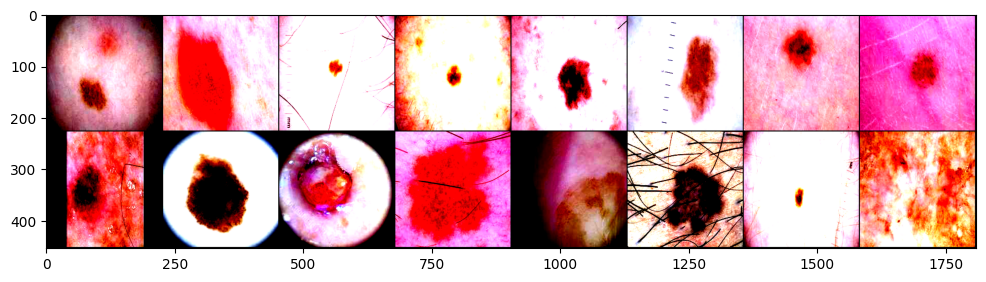

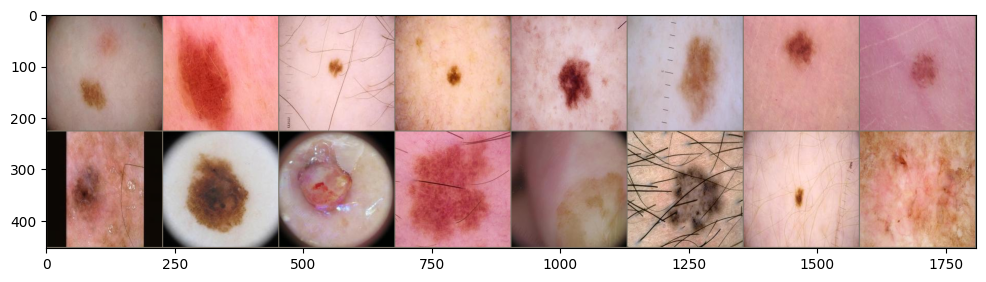

In [11]:
for images, labels in datamodule.val_dataloader():
    break
im=make_grid(images,nrow=8)

plt.figure(figsize=(12,12))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

inv_normalize=transforms.Normalize(mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
                                   std=[1/0.229,1/0.224,1/0.225])
im=inv_normalize(im)

plt.figure(figsize=(12,12))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

* Carrega um batch de imagens do conjunto de validação.
* Exibe as imagens normalizadas em uma grade.
* Desfaz a normalização para retornar as imagens aos seus valores originais.
* Exibe as imagens não normalizadas em uma nova grade.

In [12]:
device = torch.device("cpu")   #"cuda:0"

model.eval()
y_true=[]
y_pred=[]
with torch.no_grad():
    for test_data in datamodule.val_dataloader():
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())

print(classification_report(y_true,y_pred,target_names=class_names,digits=4))

              precision    recall  f1-score   support

      Benign     0.9751    0.9581    0.9665       979
   Malignant     0.9563    0.9740    0.9651       922

    accuracy                         0.9658      1901
   macro avg     0.9657    0.9660    0.9658      1901
weighted avg     0.9660    0.9658    0.9658      1901



* Avalia o modelo treinado no conjunto de validação, desabilitando o cálculo do gradiente e usando o modo de avaliação.
* Coleta as labels verdadeiras e as previsões para cada imagem.
* Calcula e imprime um relatório de classificação que fornece uma visão geral completa do desempenho do modelo.